# Homework 1

## Task2: Data Visualization and Analysis
When asking to reproduce the graphs, you are only required to reproduce the essence of the
graph. Tick locations and legend locations and specific colors and fonts are not required, but
everything needs to be clearly labeled. Do not use seaborn for any of these tasks.

### Task2.1 
Pick a graph from http://www.tylervigen.com/spurious-correlations and recreate it using
matplotlib (you can also use numpy and pandas). The code can read the data from the web or
from a text file or csv file (to be included in the repository). Ensure the axes are labeled
properly.

In [101]:
from IPython.display import display
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter)
import mglearn
import numpy as np
import pandas as pd
import sklearn
from sklearn.datasets import load_iris

%matplotlib inline

In [8]:
confirmed_df = pd.read_csv("data/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv")
deaths_df = pd.read_csv("data/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv")
recoveries_df = pd.read_csv("data/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv")
latest_data = pd.read_csv("data/COVID-19/csse_covid_19_data/csse_covid_19_daily_reports/04-24-2020.csv")

print("latest_data.head() is: ")
display(latest_data.head())

print("confirmed_df.head() is:")
display(confirmed_df.head())

cols = confirmed_df.keys()
print("confirmed_df.keys() is:")
print(cols)

latest_data.head() is: 


,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key
0,45001.0,Abbeville,South Carolina,US,2020-04-25 06:30:53,34.223334,-82.461707,24,0,0,24,"Abbeville, South Carolina, US"
1,22001.0,Acadia,Louisiana,US,2020-04-25 06:30:53,30.295065,-92.414197,129,7,0,122,"Acadia, Louisiana, US"
2,51001.0,Accomack,Virginia,US,2020-04-25 06:30:53,37.767072,-75.632346,100,3,0,97,"Accomack, Virginia, US"
3,16001.0,Ada,Idaho,US,2020-04-25 06:30:53,43.452658,-116.241552,642,14,0,628,"Ada, Idaho, US"
4,19001.0,Adair,Iowa,US,2020-04-25 06:30:53,41.330756,-94.471059,1,0,0,1,"Adair, Iowa, US"


confirmed_df.head() is:


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,784,840,906,933,996,1026,1092,1176,1279,1351
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,494,518,539,548,562,584,609,634,663,678
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,2160,2268,2418,2534,2629,2718,2811,2910,3007,3127
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,673,673,696,704,713,717,717,723,723,731
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,19,19,19,24,24,24,24,25,25,25


confirmed_df.keys() is:
Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20', '1/28/20', '1/29/20',
       '1/30/20', '1/31/20', '2/1/20', '2/2/20', '2/3/20', '2/4/20', '2/5/20',
       '2/6/20', '2/7/20', '2/8/20', '2/9/20', '2/10/20', '2/11/20', '2/12/20',
       '2/13/20', '2/14/20', '2/15/20', '2/16/20', '2/17/20', '2/18/20',
       '2/19/20', '2/20/20', '2/21/20', '2/22/20', '2/23/20', '2/24/20',
       '2/25/20', '2/26/20', '2/27/20', '2/28/20', '2/29/20', '3/1/20',
       '3/2/20', '3/3/20', '3/4/20', '3/5/20', '3/6/20', '3/7/20', '3/8/20',
       '3/9/20', '3/10/20', '3/11/20', '3/12/20', '3/13/20', '3/14/20',
       '3/15/20', '3/16/20', '3/17/20', '3/18/20', '3/19/20', '3/20/20',
       '3/21/20', '3/22/20', '3/23/20', '3/24/20', '3/25/20', '3/26/20',
       '3/27/20', '3/28/20', '3/29/20', '3/30/20', '3/31/20', '4/1/20',
       '4/2/20', '4/3/20', '4/4/20', '4/5/20', '4/6/20', '4/7/20', '4/8/20',
  

In [10]:
confirmed = confirmed_df.loc[:, cols[4]:cols[-1]]
deaths = deaths_df.loc[:, cols[4]:cols[-1]]
recoveries = recoveries_df.loc[:, cols[4]:cols[-1]]

In [12]:
dates = confirmed.keys()

world_cases = []
total_deaths = []
total_recovered = []

for i in dates:
    world_cases.append(confirmed[i].sum())
    total_deaths.append(deaths[i].sum())
    total_recovered.append(recoveries[i].sum())

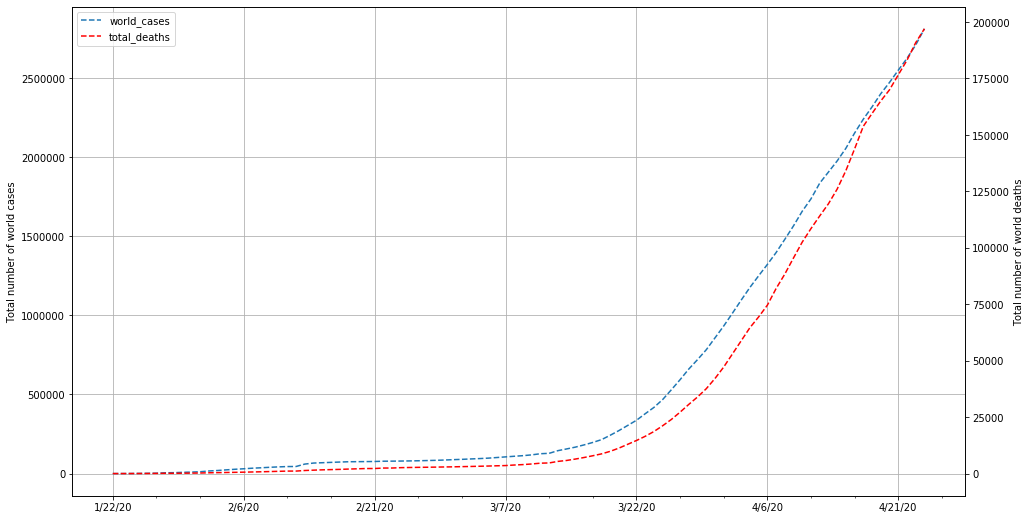

In [69]:
plt.figure(figsize=(16, 9))

ax1 = plt.gca()    # 'ax1' is of type 'AxesSubplot'.
line1, = ax1.plot(dates, world_cases, '--',)

ax2 = ax1.twinx()
line2, = ax2.plot(dates, total_deaths, '--', c='r')

ax1.set_ylabel('Total number of world cases')
ax2.set_ylabel('Total number of world deaths')

ax2.legend((line1, line2), ('world_cases', 'total_deaths'))

# Make a plot with major ticks that are multiples of 10 and minor ticks that
# are multiples of 1.  Label major ticks with '%d' formatting but don't label
# minor ticks.
ax1.xaxis.set_major_locator(MultipleLocator(15))

major_xticklabels = [''] + [dates[i] for i in range(len(dates)) if i % 15 ==0]
# 'minor' is used Whether to set the minor ticklabels rather than the major ones.
ax1.set_xticklabels(major_xticklabels, minor=False)

# For the minor ticks, use no labels; default NullFormatter.
ax1.xaxis.set_minor_locator(MultipleLocator(5))

# The grid lines to apply the changes on.
ax1.grid(which='major')

plt.show()

### Task2.2
Create a pair-plot of the iris dataset similar to Figure 1-3 in IMLP using only numpy and
matplotlib (you can use scikit-learn to load the data with sklearn.datasets.load_iris, you are not
allowed to use pandas or seaborn). Ensure all axes are labeled. The diagonals need to contain
histograms, the different species need to be distinguished by color or glyph, and there needs
to be a legend for the species. Figure 1-3 in IMLP is the figure shown below:
![IMLP-Figure 1-3](./data/homework1/malp_0101_fig13.png)

'iris_dataset' is of type <class 'sklearn.utils.Bunch'>,
which is very similar to a dictionary. It contains keys and
values.

In [72]:
iris_dataset = load_iris()
print("Keys of iris_dataset:\n", iris_dataset.keys())

Keys of iris_dataset:
 dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


The value of the key 'DESCR' is a short description of 
the dataset. We show the beginning of the description here
(feel free to look up the rest yourself):

In [73]:
print(iris_dataset['DESCR'][:193] + "\n...")

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, pre
...


The value of the key 'target_names' is an array of strings,
containing the species of flower that we want to predict:

In [76]:
print("Target names:", iris_dataset['target_names'])

Target names: ['setosa' 'versicolor' 'virginica']


The value of 'feature_names' is a list of strings, giving 
the description of each feature:

In [77]:
print("Feature names:\n", iris_dataset['feature_names'])

Feature names:
 ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


The data itself is contained in the 'target' and 'data' fields.
'data' contains the numeric measurements of sepal length, sepal
width, petal length, and petal width in a NumPy array(sepal: 花萼, petal:花瓣):

In [78]:
print("Type of data:", type(iris_dataset['data']))

Type of data: <class 'numpy.ndarray'>


The rows in the data array correspond to flowers, while the columns represent the four measurements that were taken for each flower:

In [79]:
print("Shape of data:", iris_dataset['data'].shape)

Shape of data: (150, 4)


We see that the array contains measurements for 150 different flowers. Remember that the individual items are called *samples* in machine learning, and their properties are called *features*. The shape of the data array is the number of samples times the number of features. This is a convention in scikit-learn, and your data will always be assumed to be in this shape. Here are the feature values for the first five samples:

In [80]:
print("First five rows of data:\n", iris_dataset['data'][:5])

First five rows of data:
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


From this data, we can see that all of the first five flowers have a petal width of 0.2 cm and that the first flower has the longest sepal, at 5.1cm.

The target array contains the species of each of the flowers that were measured, also as a NumPy array:

In [81]:
print("Type of target:", type(iris_dataset['target']))

Type of target: <class 'numpy.ndarray'>


target is one-dimensional array, with one entry per flower:

In [83]:
print("Shape of target:", iris_dataset['target'].shape)

Shape of target: (150,)


In [86]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    iris_dataset['data'], iris_dataset['target'], random_state=0)
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (112, 4)
y_train shape: (112,)
X_test shape: (38, 4)
y_test shape: (38,)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fce6d79c2b0>,
      dtype=object)

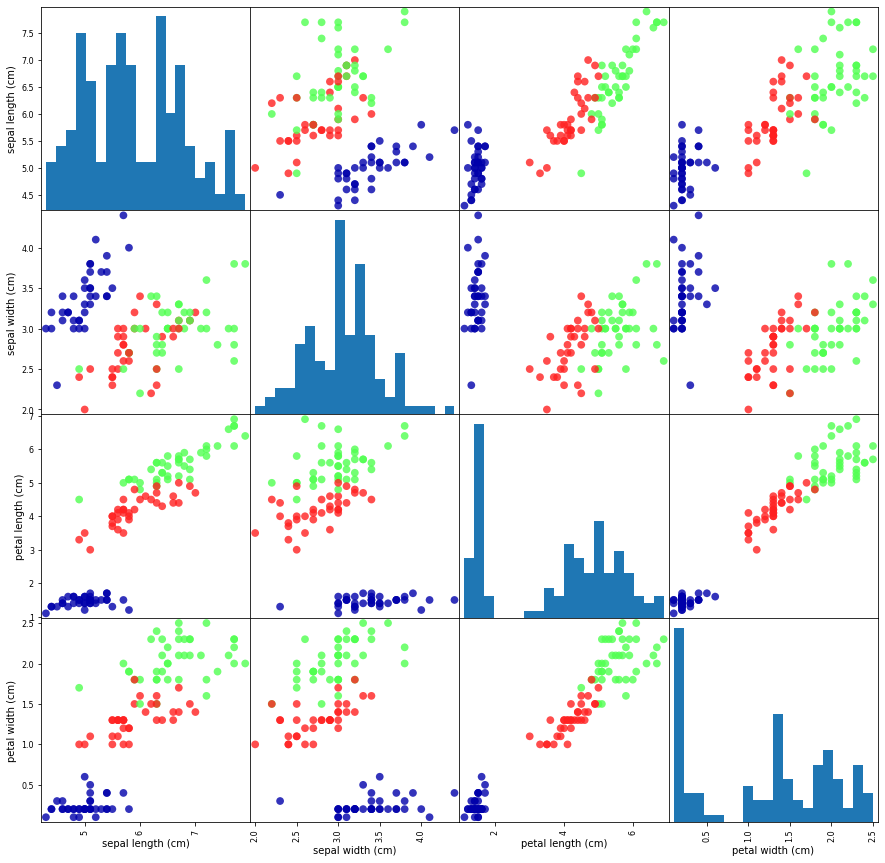

In [91]:
# create dataframe from data in X_train
# label the columns using the strings in iris_dataset.feature_names
iris_dataframe = pd.DataFrame(X_train, columns=iris_dataset.feature_names)
# create a scatter matrix from the dataframe, color by y_train
pd.plotting.scatter_matrix(iris_dataframe, c=y_train, figsize=(15, 15),
                           marker='o', hist_kwds={'bins': 20}, s=60,
                           alpha=.8, cmap=mglearn.cm3)

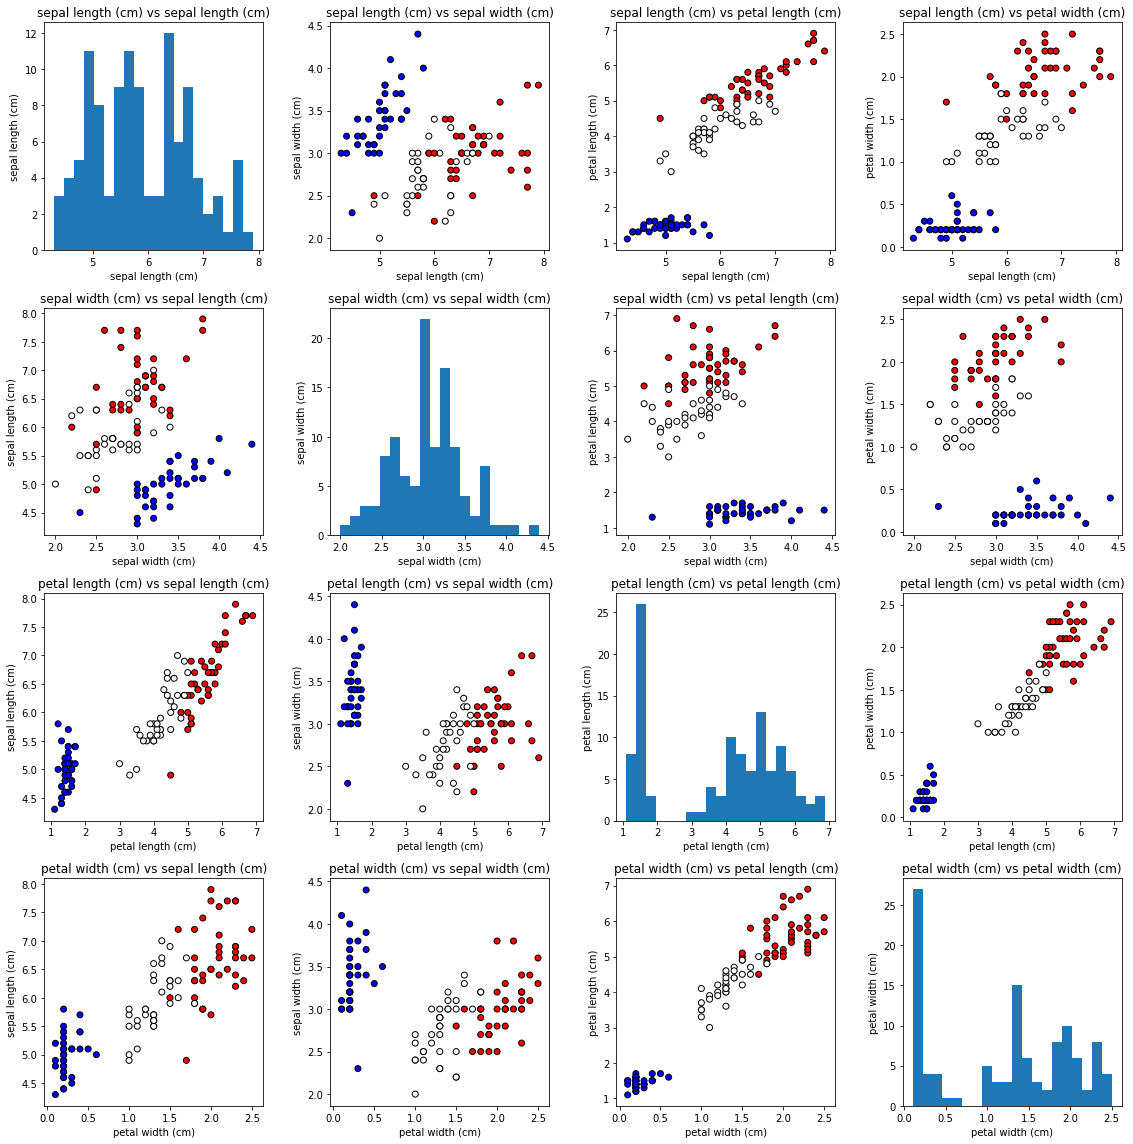

In [100]:
# TODO: diagonal is histogram, others are scatter.
fig, ax = plt.subplots(4, 4, figsize=(16, 16))

feature_names = iris_dataset['feature_names']

# h for horizontal, v for vertical.
for h_idx, h_label in enumerate(feature_names):
    for v_idx, v_label in enumerate(feature_names):
        x = X_train[:, h_idx]
        if h_idx != v_idx:
            # Scatter.
            y = X_train[:, v_idx]
            # c: color, sequence, or sequence of colors, optional.
            ax[h_idx, v_idx].scatter(x, y, c=y_train, cmap='bwr', edgecolor='k')
        else:
            # Histogram.
            ax[h_idx, v_idx].hist(x, bins=20)
        ax[h_idx, v_idx].set_title("{} vs {}".format(h_label, v_label))
        ax[h_idx, v_idx].set_xlabel(h_label)
        ax[h_idx, v_idx].set_ylabel(v_label)
plt.tight_layout() # makes stuff fit - usually works

### Task2.3 
Reproduce the graphs on overlapping data from “Fundamentals of Data Visualization”
https://serialmentor.com/dataviz/overlapping-points.html that is figures 18.1 to 18.4, using
matplotlib as subplots in a single figure. You can find the dataset on courseworks.
The code should include reading the data from the web if possible, otherwise from a text file or
csv file (to be included in the repository).

*The following contents are quoted from the book "Fundamentals of Data Visualization"*

#### 18 Handling overlapping points

When we want to visualize large or very large datasets, we often experience the challenge that simple x-y scatter plots do not work very well because many points lie on top of each other and partially or fully overlap. And similar problems can arise even in small datasets if data values were recorded with low precision or rounded, such that multiple oberservations have exactly the same numberic values. The technical term commonly used to describe this situation is "overplotting", i.e., plotting many points on top of each other. Here I describe several strategies you can pursue when encountering this challenge.

##### 18.1 Partial transparency and jittering

We first consider a scenario with only a moderate number of data points but with extensive rounding. The problem is some black dots are fully occluded by yellow dots.

<img src="data/homework1/mpg-cty-displ-solid-1.png" alt="Drawing" style="width: 400px;"/>

One way to ameliorate this problem is to use partial transparency. If we make individual points partially transparent, then overplotted points appear as darker points and thus the shade of the points reflects the density of points in that location of the graph.

<img src="data/homework1/mpg-cty-displ-transp-1.png" alt="Drawing" style="width: 400px;"/>

However, making points partially transparent is not always sufficient to solve the issue of overplotting. For example, even though we can see in Figure 18.2 that some points have a darker shade than others, it is difficult to estimate how many points were plotted on top of each other in each location. In addition, while the differences in shading are clearly visible, they are not self-explanatory. A reader who sees this figure for the first time will likely wonder why some points are darker than others and will not realize that those points are in fact multiple points stacked on top of each other. A simple trick that helps in this situation is to apply a small amount of jitter to the points, i.e. to displace each point randomly by a small amount in either the x or y direction or both. With jitter, it is immediately apparent that the darker areas arise from points that are plotted on top of each other. Also, now, for the first time the black dots representing four-wheel drive cars with 2.0 liter engines are clearly visible.

<img src="data/homework1/mpg-cty-displ-jitter-1.png" alt="Drawing" style="width: 400px;"/>

One downside of jittering is that it does change the data and therefore has to be performed with care. If we jitter too much, we end up placing points in locations that are not representative of the underlying dataset. The result is misleading visualization of the data.

<img src="data/homework1/mpg-cty-displ-jitter-extreme-1.png" alt="Drawing" style="width: 400px;"/>



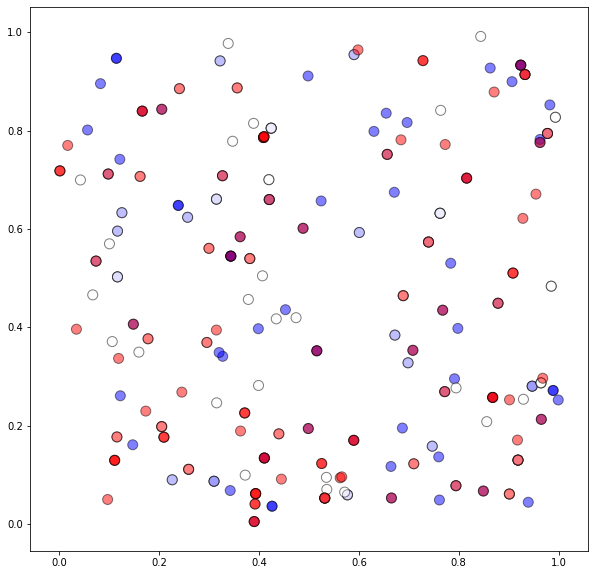

In [129]:
# Synthesize dataset with overlapping points.
total = 30

pts = np.random.uniform(low=0, high=1, size=(200, 2))

cat_a_sample = pts[np.random.choice(pts.shape[0], 100), :]
cat_b_sample = pts[np.random.choice(pts.shape[0], 100), :]
cat_c_sample = pts[np.random.choice(pts.shape[0], 100), :]
samples = np.vstack((cat_a_sample, cat_b_sample, cat_c_sample))

cats = np.array(['0']*100 + ['1']*100 + ['2']*100).astype(int)

plt.figure(figsize=(10, 10))
plt.scatter(samples[:, 0], samples[:, 1], c=cats, alpha=0.5, s=100, cmap='bwr', edgecolor='k')
plt.show()  